# 多様体学習によるDNN学習軌道のプロット

In [5]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE


In [1]:
!ls

Draw_trace.ipynb
Draw_trace.py
Experiment.py
Hessian_of_Loss.ipynb
__pycache__
bak
cifar_net.pth
data
getweights.py
gist.githubusercontent.com_nrimsky_15ed7eb69e330506bb8623e719e94784_raw_b838c74725f73f365e168ebe26cbbf666b940942_hessian_eig.py
losslog_resnet18.csv
losslog_simples.csv
manifold_plot.ipynb
manifoldplot_DNNtracepath.ipynb
params_resnet18_0.csv
params_resnet18_1.csv
params_resnet18_2.csv
params_simple_0.csv
params_simple_1.csv
params_simple_2.csv
params_simple_3.csv
params_simple_4.csv
params_simple_5.csv
params_simple_6.csv
params_simple_7.csv
params_simple_8.csv
params_simple_9.csv
params_simples_0.csv
params_simples_1.csv
params_simples_2.csv
params_simples_3.csv
params_simples_4.csv
params_simples_5.csv
params_simples_6.csv
params_simples_7.csv
params_simples_8.csv
params_simples_9.csv
simplenet.py
tracepath_plot.ipynb


In [6]:
def read_matrix(filename):   
    with open(filename) as fp:
        ls=fp.readlines()
        for i,l in enumerate(ls):
            p=[np.fromstring(l[:-1],sep=",")]
            if(i==0):        
                a=np.array(p)
                #print(a.shape)
            else:
                a=np.append(a,p,axis=0)
    return a

In [7]:
for i in range(10):
    a=read_matrix("params_simple_%d.csv"%i)
    if(i==0):
        X=np.array(a)
    else:
        X=np.append(X,a,axis=0)

nlen=X.shape[0]/10

y=[int(i/nlen) for i in range(X.shape[0])]
z=[int(i%nlen) for i in range(X.shape[0])]

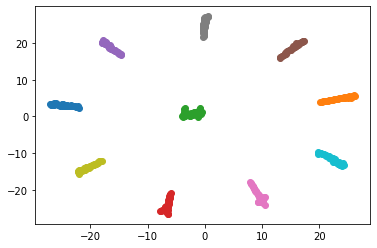

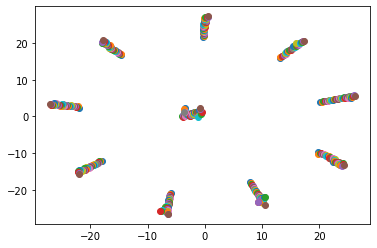

In [8]:
manifolder=MDS()

X_transformed = manifolder.fit_transform(X)

for label in np.unique(y):
        plt.scatter(X_transformed[y == label, 0], X_transformed[y == label, 1])
plt.show()
    
for label in np.unique(z):
        plt.scatter(X_transformed[z == label, 0], X_transformed[z == label, 1])
plt.show()
    

# 主な多様体学習アルゴリズム (と主成分分析)

/home/xiangze/.local/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home

/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/xiangze/.local/lib/python3.8/site-packages/scipy/sparse/_i

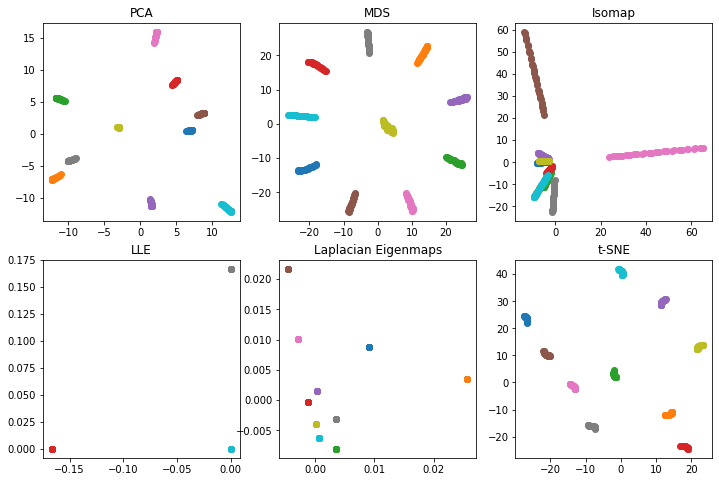

In [9]:
manifolders = {
    'PCA': PCA(),
    'MDS': MDS(),
    'Isomap': Isomap(),
    'LLE': LocallyLinearEmbedding(),
    'Laplacian Eigenmaps': SpectralEmbedding(),
    't-SNE': TSNE(),
}


plt.figure(figsize=(12, 8))
for i, (name, manifolder) in enumerate(manifolders.items()):
    plt.subplot(2, 3, i + 1)

    # 多様体学習アルゴリズムを使って教師データを 2 次元に縮約する
    X_transformed = manifolder.fit_transform(X)

    # 縮約した結果を二次元の散布図にプロットする
    for label in np.unique(y):
        plt.title(name)
        plt.scatter(X_transformed[y == label, 0], X_transformed[y == label, 1])

plt.show()